<a href="https://colab.research.google.com/github/taciomattos/taciomattos/blob/main/Code/Trabalho_30_Projeto_Aplicado_Tacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Disciplina: Projeto Aplicado Análise Preditiva e Vantagem Competitiva

#### Aluno: Tacio Roberto Mattos de Oliveira

#### Professor: Sérgio Monteiro
#### Curso: MBA em BI & Data Science


## 1) Instalação do pacote MIP

In [ ]:
!pip install mip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 67.3 MB/s eta 0:00:00


## 2) Problema a ser resolvido

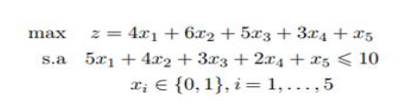




In [ ]:
from mip import Model, CBC, INTEGER, OptimizationStatus, maximize, xsum , BINARY

In [ ]:
coef_funcao_objetivo = [4, 6, 5, 3, 1]
coef_restr = [5, 4, 3, 2, 1]
termo_independente = 10

In [ ]:
I = range(len(coef_funcao_objetivo))
m = Model("knapsack")

In [ ]:
x = [m.add_var(var_type=BINARY) for i in I]

In [ ]:
m.objective = maximize(xsum(coef_funcao_objetivo[i] * x[i] for i in I))

In [ ]:
m += xsum(coef_restr[i] * x[i] for i in I) <= termo_independente
print(f'O modelo tem {m.num_cols} variável(eis), {m.num_rows} restrição(ões) e {m.num_nz} zero(s)')

O modelo tem 5 variável(eis), 1 restrição(ões) e 5 zero(s)


In [ ]:
status = m.optimize(max_seconds=2)

In [ ]:
status == OptimizationStatus.OPTIMAL

True

In [ ]:
itens_selecionados = ["x"+str(i+1) for i in I if x[i].x >= 0.99]
print("Itens selecionados: {}".format(itens_selecionados))

Itens selecionados: ['x2', 'x3', 'x4', 'x5']


### Acrescentar Restrição para selecionar, no máximo, 3 itens

In [ ]:
from mip import Model, maximize, xsum, CBC, BINARY, OptimizationStatus

In [ ]:
coef_funcao_objetivo = [4, 6, 5, 3, 1]
coef_restr_menor_igual = [[5, 4, 3, 2, 1],
                          [1,1,1,1,1]]
termos_independentes = [10, 3] 

In [ ]:
I = range(len(coef_funcao_objetivo))
m = Model("meu_portfolio")

In [ ]:
x = [m.add_var(var_type=BINARY) for i in I]

In [ ]:
m.objective = maximize(xsum(coef_funcao_objetivo[i] * x[i] for i in I))

In [ ]:
n=len(termos_independentes)
for k in range(n):
  restricao = xsum(coef_restr_menor_igual[k][i] * x[i] for i in I) <= termos_independentes[k]
  print(restricao)
  m += restricao

+ 5var(0) + 4var(1) + 3var(2) + 2var(3) + var(4)  <= 10.0
+ var(0) + var(1) + var(2) + var(3) + var(4)  <= 3.0


In [ ]:
print(f'O modelo tem {m.num_cols} variável(eis), {m.num_rows} restrição(ões)')

O modelo tem 5 variável(eis), 2 restrição(ões)


In [ ]:
status = m.optimize()

In [ ]:
status == OptimizationStatus.OPTIMAL

True

In [ ]:
itens_selecionados = ["x"+str(i+1) for i in I if x[i].x >= 0.99]
print("Itens selecionados: {}".format(itens_selecionados))

Itens selecionados: ['x2', 'x3', 'x4']


In [ ]:
print(f'Valor da solução ótima = {m.objective_value}')

Valor da solução ótima = 14.0


### Acrescentar Restrição para selecionar determinados itens

In [ ]:
from mip import Model, maximize, xsum, CBC, BINARY, OptimizationStatus

In [ ]:
coef_funcao_objetivo = [4, 6, 5, 3, 1]

In [ ]:
coef_restr_menor_igual = [[5, 4, 3, 2, 1],
                          [1,1,1,1,1]]
termos_independentes_menor_igual = [10, 3] 

In [ ]:
coef_restr_igualdade = [[1, 0, 0, 0, 1]]
termos_independentes_igualdade = [1] 

In [ ]:
I = range(len(coef_funcao_objetivo))
m = Model("meu_portfolio_3")

In [ ]:
x = [m.add_var(var_type=BINARY) for i in I]

In [ ]:
m.objective = maximize(xsum(coef_funcao_objetivo[i] * x[i] for i in I))

In [ ]:
n=len(termos_independentes_menor_igual)
for k in range(n):
  restricao = xsum(coef_restr_menor_igual[k][i] * x[i] for i in I) <= termos_independentes_menor_igual[k]
  print(restricao)
  m += restricao

+ 5var(0) + 4var(1) + 3var(2) + 2var(3) + var(4)  <= 10.0
+ var(0) + var(1) + var(2) + var(3) + var(4)  <= 3.0


In [ ]:
n=len(termos_independentes_igualdade)
for k in range(n):
  restricao = xsum(coef_restr_igualdade[k][i] * x[i] for i in I) == termos_independentes_igualdade[k]
  print(restricao)
  m += restricao

+ var(0) + 0var(1) + 0var(2) + 0var(3) + var(4)  = 1.0


In [ ]:
print(f'O modelo tem {m.num_cols} variável(eis), {m.num_rows} restrição(ões)')

O modelo tem 5 variável(eis), 3 restrição(ões)


In [ ]:
status = m.optimize()

In [ ]:
status == OptimizationStatus.OPTIMAL

True

## 3) Problema das ações

# Predições:
###PETR4.SA  - 0.12617773
###ABUD34.SA - 0.13340005
###MMMC34.SA - 0.12759925
###A1BB34.SA - 0.15644327
###ABTT34.SA - 0.15581788
###ABBV34.SA = 0.1243235
###RYTT34.SA - 0.1869132
###USBC34.SA - -0.00068114
###ADBE34.SA - 0.18214712
###XPBR31.SA - 0.1471158


In [ ]:
from mip import Model, maximize, xsum, CBC, BINARY, OptimizationStatus

coef_funcao_objetivo = [0.12617773, 0.13340005, 0.12759925, 0.15644327, 0.15581788, 0.1243235, 0.1869132, -0.00068114, 0.18214712, 0.1471158]
coef_restr_menor_igual = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1,1,1,1,1]]
termos_independentes = [3] 

I = range(len(coef_funcao_objetivo))
m = Model("acoes")

x = [m.add_var(var_type=BINARY) for i in I]

m.objective = maximize(xsum(coef_funcao_objetivo[i] * x[i] for i in I))

n=len(termos_independentes)

for k in range(n):
  restricao = xsum(coef_restr_menor_igual[k][i] * x[i] for i in I) <= termos_independentes[k]
  print(restricao)
  m += restricao

print(f'O modelo tem {m.num_cols} variável(eis), {m.num_rows} restrição(ões)')

status = m.optimize()

status == OptimizationStatus.OPTIMAL

itens_selecionados = ["x"+str(i+1) for i in I if x[i].x >= 0.99]
print("Itens selecionados: {}".format(itens_selecionados))

print(f'Valor da solução ótima = {m.objective_value}')


+ var(0) + var(1) + var(2) + var(3) + var(4) + var(5) + var(6) + var(7) + var(8) + var(9)  <= 3.0
O modelo tem 10 variável(eis), 1 restrição(ões)
Itens selecionados: ['x4', 'x7', 'x9']
Valor da solução ótima = 0.52550359
